<a href="https://colab.research.google.com/github/manitprats/Classification/blob/main/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/brca.csv')

In [6]:
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [9]:
df.columns

Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [10]:
df.shape

(569, 31)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [14]:
df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
df.isnull().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

<Axes: ylabel='y'>

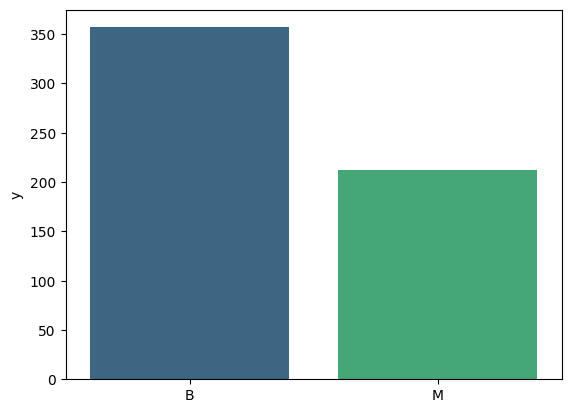

In [17]:
sns.barplot(x = df["y"].unique(), y = df["y"].value_counts(), palette= 'viridis')

array([[<Axes: title={'center': 'x.radius_mean'}>,
        <Axes: title={'center': 'x.texture_mean'}>,
        <Axes: title={'center': 'x.perimeter_mean'}>,
        <Axes: title={'center': 'x.area_mean'}>,
        <Axes: title={'center': 'x.smoothness_mean'}>],
       [<Axes: title={'center': 'x.compactness_mean'}>,
        <Axes: title={'center': 'x.concavity_mean'}>,
        <Axes: title={'center': 'x.concave_pts_mean'}>,
        <Axes: title={'center': 'x.symmetry_mean'}>,
        <Axes: title={'center': 'x.fractal_dim_mean'}>],
       [<Axes: title={'center': 'x.radius_se'}>,
        <Axes: title={'center': 'x.texture_se'}>,
        <Axes: title={'center': 'x.perimeter_se'}>,
        <Axes: title={'center': 'x.area_se'}>,
        <Axes: title={'center': 'x.smoothness_se'}>],
       [<Axes: title={'center': 'x.compactness_se'}>,
        <Axes: title={'center': 'x.concavity_se'}>,
        <Axes: title={'center': 'x.concave_pts_se'}>,
        <Axes: title={'center': 'x.symmetry_se'}>,

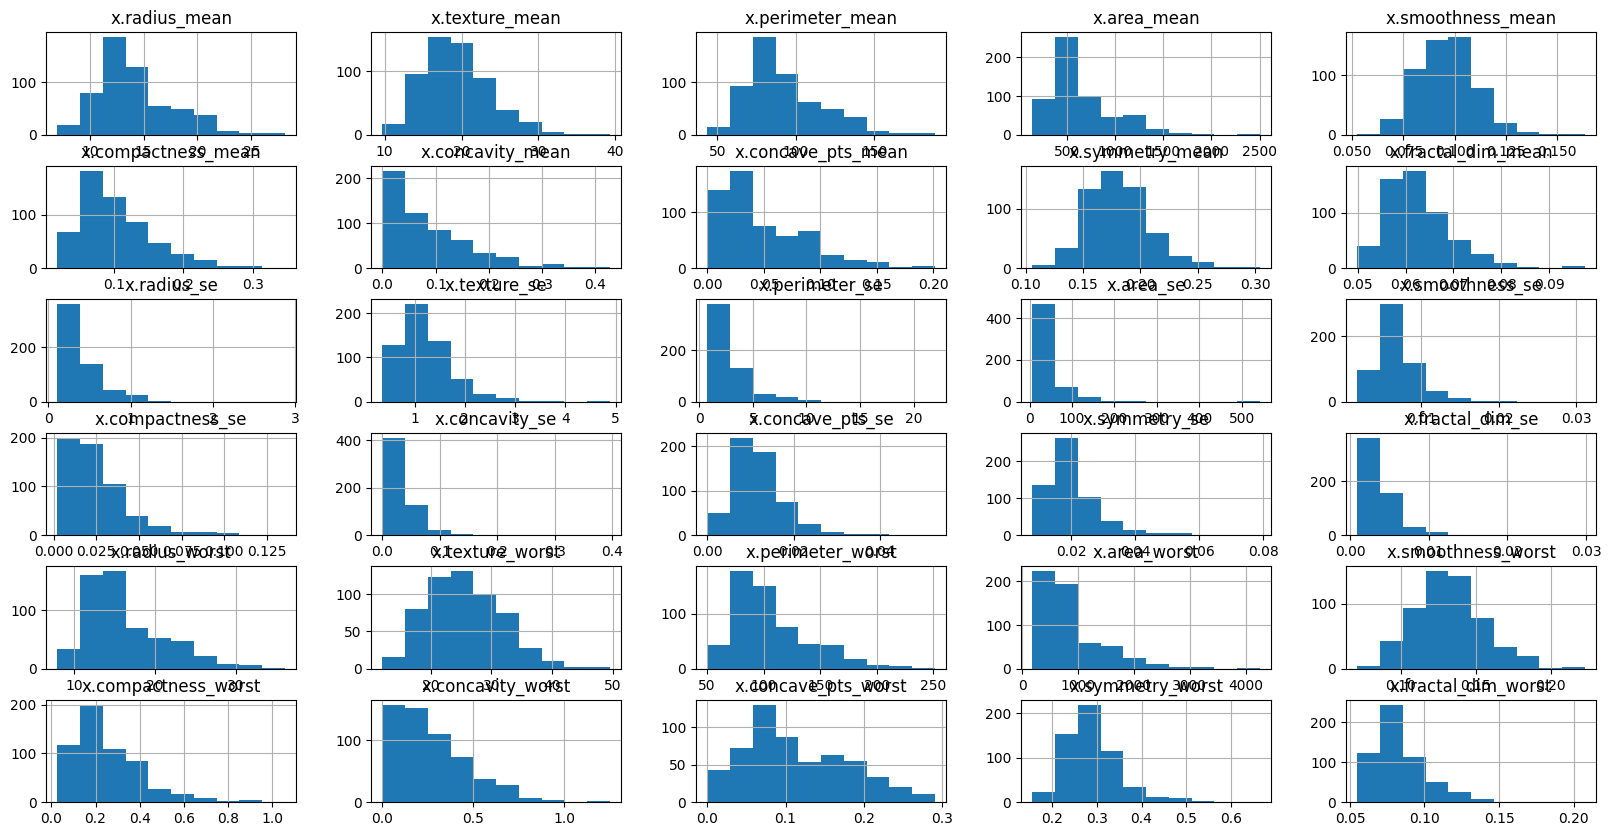

In [18]:
df.hist(figsize=(20,10))

In [19]:
label_encoded = LabelEncoder()
df['y'] = label_encoded.fit_transform(df['y'])

In [20]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [21]:
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape


(455, 30)

In [23]:
X_train[:5]


array([[-1.66281784,  0.34936257, -1.58598247, -1.26260845, -0.19248395,
         0.48327515,  0.55256596, -0.71533989,  1.44628966,  2.71459624,
        -0.75180669,  1.36799765, -0.79712766, -0.63733857,  1.84516862,
         1.64673238,  1.48893413, -0.26474706,  0.27957279,  3.06083038,
        -1.47183426,  0.67952891, -1.459128  , -1.09402837,  1.33104727,
         1.10506637,  1.28466984, -0.55410532,  0.63011867,  3.48450579],
       [-0.30948426, -1.15645148, -0.3132375 , -0.38531096, -0.1519892 ,
        -0.10615264, -0.65952482, -0.73364668, -0.58756253,  1.29924774,
        -0.79481705, -1.04827471, -0.95634389, -0.54786643, -0.62462384,
        -0.14849558, -0.02564888, -0.76596531, -0.51023721,  0.72450811,
        -0.51583223, -1.39670653, -0.5823274 , -0.52337823, -0.82131287,
        -0.37857096, -0.62136459, -0.86793434, -0.75265805,  0.89642415],
       [-0.61867177, -1.05870157, -0.55985508, -0.61565807,  1.31008442,
         0.46607952, -0.66310786, -0.49696605,  0

##Logistic Regression

In [24]:
reg = LogisticRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [25]:
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [26]:
lr_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred)
lr_results

{'accuracy': 96.49122807017544,
 'precision': 0.9649122807017544,
 'recall': 0.9649122807017544,
 'f1': 0.9649122807017544}

##DNN

In [27]:
early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=10, 
    restore_best_weights=True,
)

In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(56, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_history = model.fit(X_train,
                                y_train,
                                epochs=100,
                                validation_data=(X_test, y_test),
                                callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 4s 114ms/step - loss: 0.4620 - accuracy: 0.8176 - val_loss: 0.1985 - val_accuracy: 0.9298
Epoch 2/100
15/15 [==============================] - 0s 24ms/step - loss: 0.1860 - accuracy: 0.9560 - val_loss: 0.1350 - val_accuracy: 0.9211
Epoch 3/100
15/15 [==============================] - 0s 17ms/step - loss: 0.1053 - accuracy: 0.9670 - val_loss: 0.1166 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 17ms/step - loss: 0.1091 - accuracy: 0.9670 - val_loss: 0.1006 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 15ms/step - loss: 0.0788 - accuracy: 0.9736 - val_loss: 0.1164 - val_accuracy: 0.9474
Epoch 6/100
15/15 [==============================] - 0s 21ms/step - loss: 0.0691 - accuracy: 0.9780 - val_loss: 0.1259 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0841 - accuracy: 0.9802 - val_loss: 0.1104 - val_accuracy: 0.9561
Epoch

<Axes: >

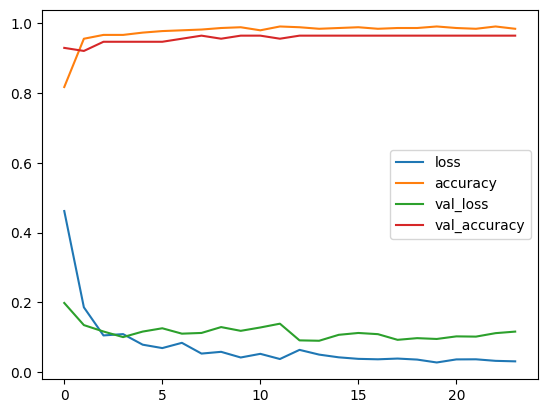

In [29]:
pd.DataFrame(model_history.history).plot()

In [30]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0901 - accuracy: 0.9649


[0.09005837142467499, 0.9649122953414917]

In [31]:
y_pred_nn = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [32]:
y_pred_nn = tf.round(y_pred_nn)

In [33]:
y_pred_nn[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [34]:
dnn_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred_nn)
dnn_results

{'accuracy': 96.49122807017544,
 'precision': 0.9649122807017544,
 'recall': 0.9649122807017544,
 'f1': 0.9649122807017544}

##XGB


In [35]:
xgb = XGBClassifier().fit(X_train, y_train)

In [36]:
y_pred_xgb = xgb.predict(X_test)

In [37]:
y_pred_xgb[:5]

array([0, 0, 0, 1, 1])

In [38]:
xgb_results = calculate_results(y_true=y_test,
                                     y_pred=y_pred_xgb)
xgb_results

{'accuracy': 94.73684210526315,
 'precision': 0.9488079172289698,
 'recall': 0.9473684210526315,
 'f1': 0.9468057045386604}

##Model Comparison

In [39]:
all_model_results = pd.DataFrame({"logistic_regression": lr_results,
                                  "DNN": dnn_results,
                                  "XGBClassifier": xgb_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
logistic_regression,96.491228,0.964912,0.964912,0.964912
DNN,96.491228,0.964912,0.964912,0.964912
XGBClassifier,94.736842,0.948808,0.947368,0.946806


In [40]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

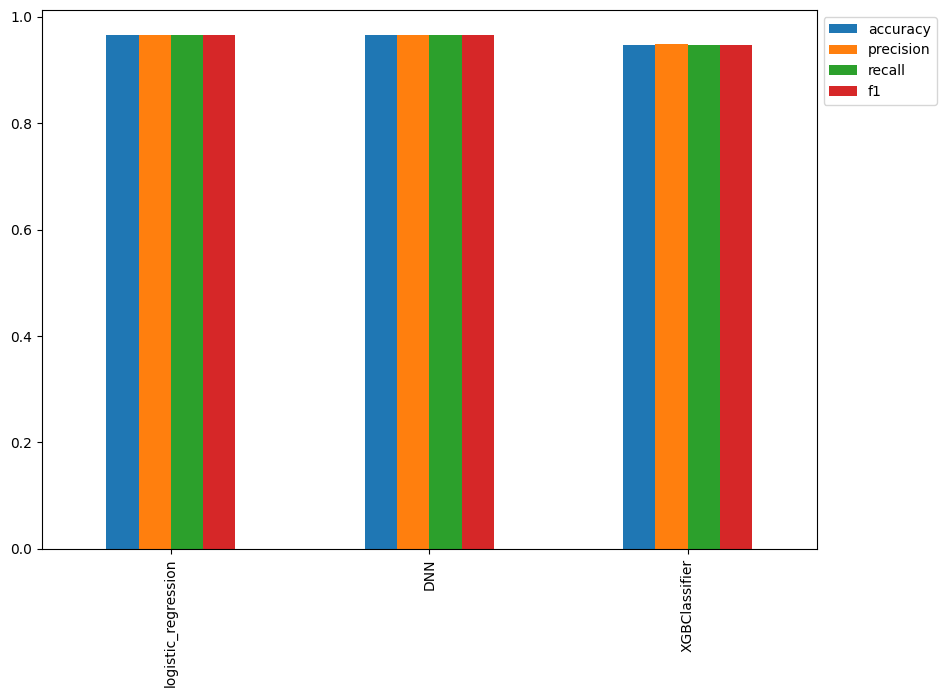

In [41]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))